### Business Goal
Predicting the Sales based on various advertisment factors.


## Step 1: Reading and Understanding the Data

In [2]:
# import all libraries and dependencies for dataframe
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from datetime import datetime, timedelta

# import all libraries and dependencies for data visualization
pd.options.display.float_format='{:.4f}'.format
plt.rcParams['figure.figsize'] = [8,8]
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_colwidth', -1) 
sns.set(style='darkgrid')
import matplotlib.ticker as ticker
import matplotlib.ticker as plticker

# import all libraries and dependencies for machine learning
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.base import TransformerMixin
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import statsmodels.api as sm
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import r2_score

In [3]:
# Reading the advertising company file on which analysis needs to be done
df_sales = pd.read_csv('advertising.csv')

In [4]:
df_sales.head()

,TV,Radio,Newspaper,Sales
0,230.1000,37.8000,69.2000,22.1000
1,44.5000,39.3000,45.1000,10.4000
2,17.2000,45.9000,69.3000,12.0000
3,151.5000,41.3000,58.5000,16.5000
4,180.8000,10.8000,58.4000,17.9000


####   Understanding the dataframe

In [5]:
df_sales.shape

(200, 4)

In [6]:
df_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [7]:
df_sales.describe()

,TV,Radio,Newspaper,Sales
count,200.0000,200.0000,200.0000,200.0000
mean,147.0425,23.2640,30.5540,15.1305
std,85.8542,14.8468,21.7786,5.2839
min,0.7000,0.0000,0.3000,1.6000
25%,74.3750,9.9750,12.7500,11.0000
50%,149.7500,22.9000,25.7500,16.0000
75%,218.8250,36.5250,45.1000,19.0500
max,296.4000,49.6000,114.0000,27.0000


### Step 2: Cleaning the Data
    
    We need to do some basic cleansing activity in order to feed our model the correct data.

In [8]:
# Calculating the Missing Values % contribution in DF

df_null = df_sales.isna().mean().round(4) * 100

df_null.sort_values(ascending=False).head()

Sales       0.0000
Newspaper   0.0000
Radio       0.0000
TV          0.0000
dtype: float64

In [9]:
df_sales.dtypes

TV           float64
Radio        float64
Newspaper    float64
Sales        float64
dtype: object

Text(0.5, 0, 'Continuous Variable')

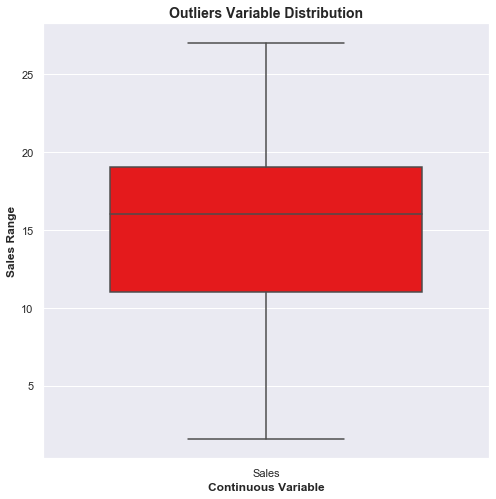

In [10]:
# Outlier Analysis of target variable with maximum amount of Inconsistency

outliers = ['Sales']
plt.rcParams['figure.figsize'] = [8,8]
sns.boxplot(data=df_sales[outliers], orient="v", palette="Set1" ,whis=1.5,saturation=1, width=0.7)
plt.title("Outliers Variable Distribution", fontsize = 14, fontweight = 'bold')
plt.ylabel("Sales Range", fontweight = 'bold')
plt.xlabel("Continuous Variable", fontweight = 'bold')

### Insights:
    There are no such value that falls under the outliers

In [11]:
# checking for duplicates

df_sales.loc[df_sales.duplicated()]

,TV,Radio,Newspaper,Sales


### Step 3: Visualising the Data


    Here we will identify if some predictors directly have a strong association with the outcome variable Sales


Visualizing the distribution of Sales

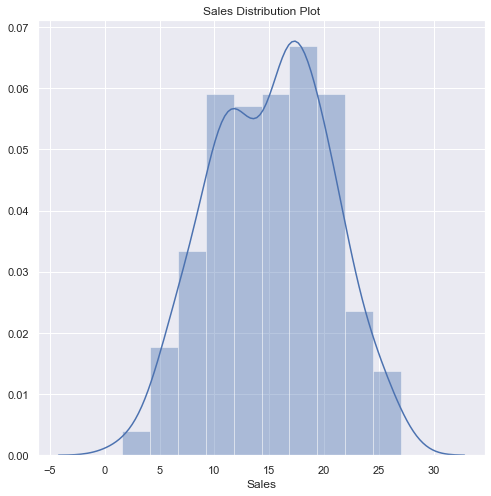

In [12]:
plt.figure(figsize=(8,8))

plt.title('Sales Distribution Plot')
sns.distplot(df_sales['Sales'])

### Visualising Numeric Variables
    Pairplot of all the numeric variables

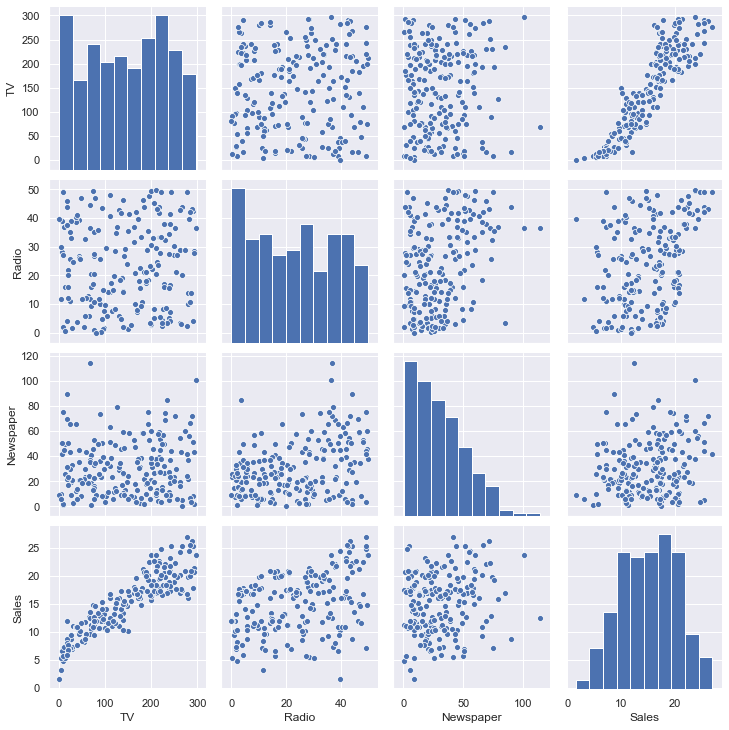

In [13]:
sns.pairplot(df_sales)

### Insights:

    
    TV seems to have a linear relationship with Sales.


Visualization of Heat map

(4.5, -0.5)

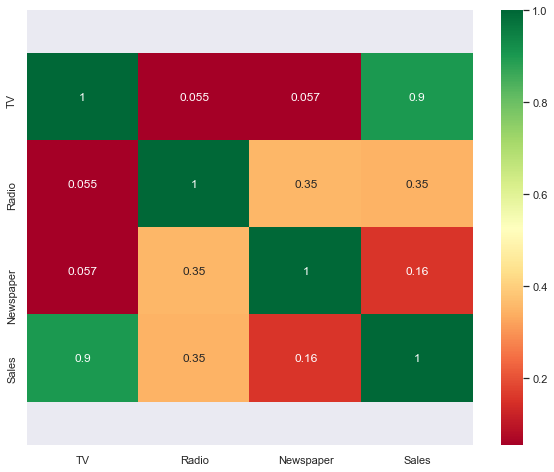

In [14]:
# Let's check the correlation coefficients to see which variables are highly correlated

plt.figure(figsize = (10, 8))
df_corr = df_sales.corr()
ax = sns.heatmap(df_corr, annot=True, cmap="RdYlGn") 
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

### Step 4: Splitting the Data into Training and Testing Sets
    
    As we know, the first basic step for regression is performing a train-test split.



In [15]:
# We specify this so that the train and test data set always have the same rows, respectively
# We divide the df into 70/30 ratio

np.random.seed(0)
df_train, df_test = train_test_split(df_sales, train_size = 0.7, test_size = 0.3, random_state = 100)

In [16]:
df_train.head()

,TV,Radio,Newspaper,Sales
74,213.4000,24.6000,13.1000,17.0000
3,151.5000,41.3000,58.5000,16.5000
185,205.0000,45.1000,19.6000,22.6000
26,142.9000,29.3000,12.6000,15.0000
90,134.3000,4.9000,9.3000,14.0000


In [17]:
cols = ['TV','Radio','Newspaper']

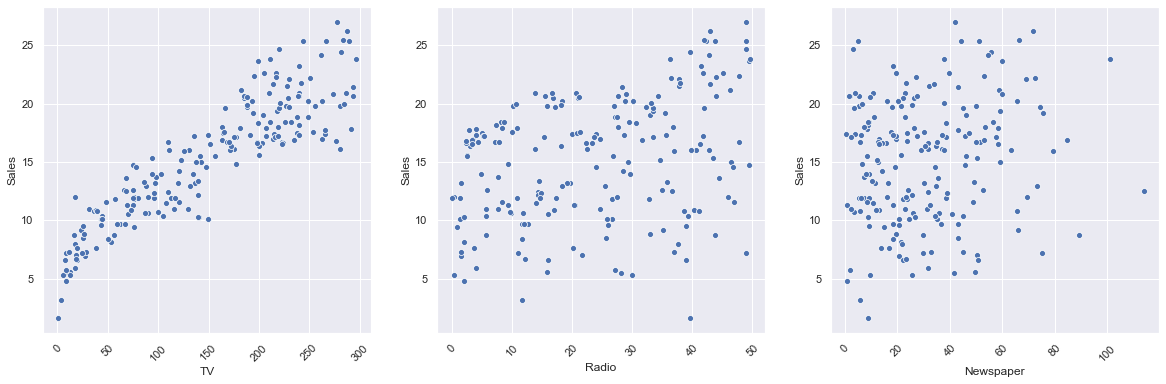

In [18]:
# Scatter Plot of independent variables vs dependent variables

fig,axes = plt.subplots(1,3,figsize=(20,6))
for seg,col in enumerate(cols):
    x,y = seg//3,seg%3
    an=sns.scatterplot(x=col, y='Sales' ,data=df_sales, ax=axes[y])
    plt.setp(an.get_xticklabels(), rotation=45)
   
plt.subplots_adjust(hspace=0.5)


#####        
    
    We can see there is a line we can fit Sales vs TV




### Dividing into X and Y sets for the model building


In [19]:
y_train = df_train.pop('Sales')
X_train = df_train

###  Step 5: Building a linear model

In [20]:
X_train_1 = X_train['TV']

In [21]:
# Add a constant
X_train_1c = sm.add_constant(X_train_1)

# Create a first fitted model
lr_1 = sm.OLS(y_train, X_train_1c).fit()


In [22]:
# Check parameters created

lr_1.params


const   6.9487
TV      0.0545
dtype: float64

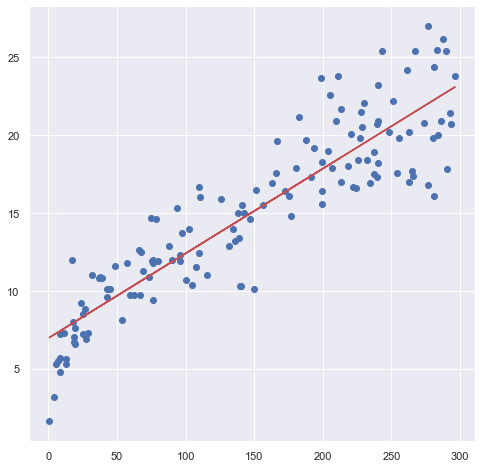

In [23]:
# Let's visualise the data with a scatter plot and the fitted regression line

plt.scatter(X_train_1c.iloc[:, 1], y_train)
plt.plot(X_train_1c.iloc[:, 1], 6.9487 + 0.0545*X_train_1c.iloc[:, 1], 'r')
plt.show()


In [24]:
# Print a summary of the linear regression model obtained
print(lr_1.summary())


                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.816
Model:                            OLS   Adj. R-squared:                  0.814
Method:                 Least Squares   F-statistic:                     611.2
Date:                Sun, 25 Oct 2020   Prob (F-statistic):           1.52e-52
Time:                        13:14:43   Log-Likelihood:                -321.12
No. Observations:                 140   AIC:                             646.2
Df Residuals:                     138   BIC:                             652.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.9487      0.385     18.068      0.0

###  Adding another variable
    The R-squared value obtained is 0.81. Since we have two more variables, we can try do better than this. So let's go ahead and add another variable, i.e. Radio.



In [25]:
X_train_2 = X_train[['TV', 'Radio']]


# Add a constant
X_train_2c = sm.add_constant(X_train_2)

# Create a second fitted model
lr_2 = sm.OLS(y_train, X_train_2c).fit()

In [26]:
lr_2.params

const   4.4251
TV      0.0540
Radio   0.1137
dtype: float64

In [27]:
print(lr_2.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.910
Model:                            OLS   Adj. R-squared:                  0.909
Method:                 Least Squares   F-statistic:                     692.3
Date:                Sun, 25 Oct 2020   Prob (F-statistic):           2.38e-72
Time:                        13:16:12   Log-Likelihood:                -271.02
No. Observations:                 140   AIC:                             548.0
Df Residuals:                     137   BIC:                             556.9
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.4251      0.342     12.923      0.0

#####     
     The R-squared incresed from 0.81 to 0.91
    





####   Adding another variable
    The R-squared value obtained is 0.91. Since we have one more variable, we can add and see the results.



In [28]:
X_train_3 = X_train[['TV', 'Radio', 'Newspaper']]

In [29]:
# Add a constant
X_train_3c = sm.add_constant(X_train_3)

# Create a third fitted model
lr_3 = sm.OLS(y_train, X_train_3c).fit()


In [30]:
lr_3.params

const       4.3346
TV          0.0538
Radio       0.1100
Newspaper   0.0063
dtype: float64

In [31]:
print(lr_3.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.910
Model:                            OLS   Adj. R-squared:                  0.909
Method:                 Least Squares   F-statistic:                     461.2
Date:                Sun, 25 Oct 2020   Prob (F-statistic):           4.73e-71
Time:                        13:43:04   Log-Likelihood:                -270.60
No. Observations:                 140   AIC:                             549.2
Df Residuals:                     136   BIC:                             561.0
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.3346      0.357     12.139      0.0

####    We have achieved a R-squared of 0.91 by picking the right variables. Hence we can use these two variables to predict Sales using model lr_2.



### Step 6: Residual Analysis of the train data
So, now to check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), let us plot the histogram of it.



In [32]:
# Predicting the price of training set.
y_train_sales = lr_2.predict(X_train_2c)

Text(0.5, 0, 'Errors')

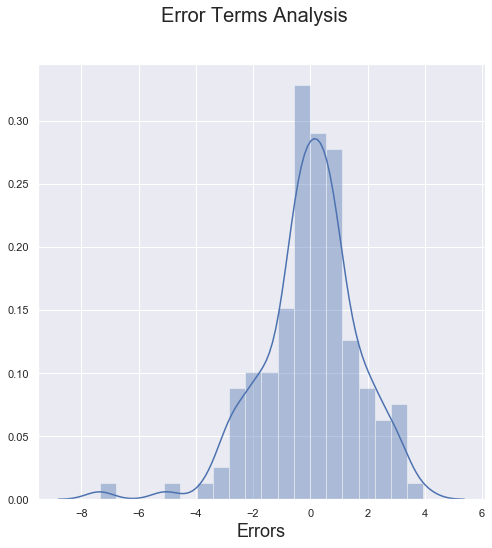

In [33]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_sales), bins = 20)
fig.suptitle('Error Terms Analysis', fontsize = 20)                   
plt.xlabel('Errors', fontsize = 18)


### Step 7: Making Predictions Using the Final Model
    Now that we have fitted the model and checked the normality of error terms, it's time to go ahead and make predictions using the final model.



#### Dividing test set into X_test and y_test


In [34]:
y_test = df_test.pop('Sales')
X_test = df_test

In [35]:
# Adding constant
X_test_1 = sm.add_constant(X_test)

X_test_new = X_test_1[X_train_2c.columns]



# Making predictions using the final model
y_pred = lr_2.predict(X_test_new)


###  Step 8: Model Evaluation
    Let's now plot the graph for actual versus predicted values.



Text(0, 0.5, 'y_pred')

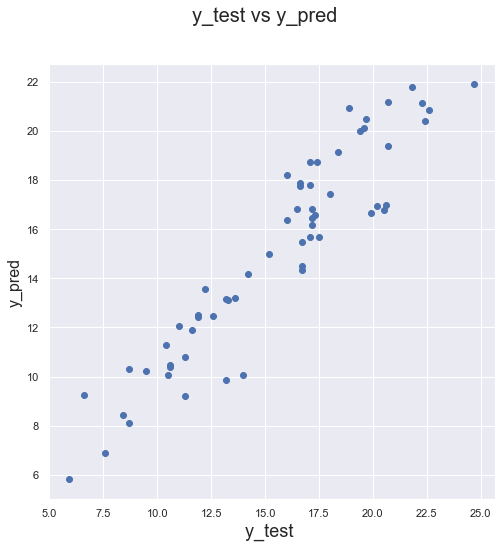

In [36]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)   
plt.xlabel('y_test ', fontsize=18)                       
plt.ylabel('y_pred', fontsize=16)    


#### RMSE Score





In [37]:
r2_score(y_test, y_pred)

0.8702269065022534

### The R2 score of Training set is 0.90 and Test set is 0.87 which is quite close. Hence, We can say that our model is good enough to predict the Sales using below predictor variables

TV

Radio


#### Equation of Line to predict the Sales
    Sales=4.4251+0.0540×TV+0.1137×Radio 


#### Model Conclusions:
    *R-sqaured and Adjusted R-squared - 0.910 and 0.909 - 90% variance explained.
    *F-stats and Prob(F-stats) (overall model fit) - 692.3 and 2.38e-72(approx. 0.0) - Model fit is significant and explained 90% variance is just not by chance.
    *p-values - p-values for all the coefficients seem to be less than the significance level of 0.05. - meaning that all the
     predictors are statistically significant.
